##小地域の収入推定

Dataフォルダには、小地域の収入データ(income_district.csv)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。

* データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい

* データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい

* モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
age = pd.read_csv('h27_age_df.csv')
family = pd.read_csv('h27_family_df.csv')
gender = pd.read_csv('h27_gender_df2.csv')
house = pd.read_csv('h27_house_df.csv')
house_info = pd.read_csv('h27_house_info_df.csv')
industry = pd.read_csv('h27_indusry_df.csv')
job = pd.read_csv('h27_job_df.csv')
labor = pd.read_csv('h27_labor_df.csv')
marriage = pd.read_csv('h27_marriage_df.csv')
work_status = pd.read_csv('h27_work_status_df.csv')
income_district = pd.read_csv('income_district.csv')

#データの構造確認

##age

In [29]:
age.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,10-14,15-19,20-24,...,55-59_female,60-64_female,65-69_female,70-74_female,75-79_female,80-84_female,85-89_female,90-94_female,95-99_female,100_female
0,45201,NaN,1,宮崎県,宮崎市,NaN,NaN,19220,20777,17510,...,13420,15035,16040,11697,10052,9160,6430,3357,1021,208
1,45201,10.0,2,宮崎県,宮崎市,橘通西,NaN,32,56,61,...,35,47,43,44,20,16,9,5,3,1
2,45201,1001.0,3,宮崎県,宮崎市,橘通西,１丁目,9,6,11,...,15,15,16,14,7,7,4,3,-,-
3,45201,1002.0,3,宮崎県,宮崎市,橘通西,２丁目,2,10,18,...,4,10,11,14,2,2,3,1,3,1
4,45201,1003.0,3,宮崎県,宮崎市,橘通西,３丁目,-,1,-,...,1,-,-,2,-,1,-,-,-,-


In [30]:
age.shape

(251258, 68)

##family

In [31]:
family.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,family_count,family_member_count,general_family_count,member_1,member_2,member_3,member_4,member_5,member_6,member_7
0,25201,NaN,1,滋賀県,大津市,NaN,NaN,136153,340973,135957,39153,39186,25980,22117,7034,1830,657
1,25201,10.0,2,滋賀県,大津市,葛川坂下町,NaN,19,38,19,8,7,1,2,1,-,-
2,25201,20.0,2,滋賀県,大津市,葛川木戸口町,NaN,10,17,10,5,4,-,1,-,-,-
3,25201,30.0,2,滋賀県,大津市,葛川中村町,NaN,15,31,15,7,4,3,-,-,-,1
4,25201,40.0,2,滋賀県,大津市,葛川坊村町,NaN,22,38,22,11,8,1,2,-,-,-


In [32]:
family.shape

(251258, 17)

##gender

In [33]:
gender.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,population,male_population,female_population,family_count
0,18201,NaN,1,福井県,福井市,NaN,NaN,265904,128892,137012,99872
1,18201,10.0,2,福井県,福井市,明里町,NaN,386,191,195,193
2,18201,30.0,2,福井県,福井市,足谷町,NaN,X,X,X,X
3,18201,40.0,2,福井県,福井市,足羽,NaN,2881,1382,1499,1178
4,18201,4001.0,3,福井県,福井市,足羽,１丁目,771,375,396,314


In [34]:
gender.shape

(251258, 11)

##house

In [35]:
house.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,family_house,own_house_family,public_rent_family,private_rent_family,salary_rent_family,room_rent_family,other_house_family,own_house_individual,public_rent_individual,private_rent_individual,salary_rent_individual,room_rent_individual,other_house_individual
0,25201,NaN,1,滋賀県,大津市,NaN,NaN,135957,97948,5183,27685,2501,777,1856,269022,9676,46261,5570,1585,2746
1,25201,10.0,2,滋賀県,大津市,葛川坂下町,NaN,19,19,-,-,-,-,-,38,-,-,-,-,-
2,25201,20.0,2,滋賀県,大津市,葛川木戸口町,NaN,10,10,-,-,-,-,-,17,-,-,-,-,-
3,25201,30.0,2,滋賀県,大津市,葛川中村町,NaN,15,14,-,-,1,-,-,30,-,-,1,-,-
4,25201,40.0,2,滋賀県,大津市,葛川坊村町,NaN,22,17,-,-,2,-,3,31,-,-,4,-,3


In [36]:
house.shape

(251258, 20)

##house_info

In [37]:
house_info.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,single_house_family,long_house_family,share_house_family,...,3-5floor_family,6-10floor_family,11floor_family,single_house_individual,long_house_individual,share_house_individual,1-2floor_individual,3-5floor_individual,6-10floor_individual,11floor_individual
0,27102,NaN,1,大阪府,大阪市都島区,NaN,NaN,9431,954,40447,...,9030,13457,16915,23379,1773,76699,1400,14645,21284,39370
1,27102,10.0,2,大阪府,大阪市都島区,片町,NaN,84,3,1342,...,166,896,276,202,8,1800,4,219,1152,425
2,27102,1001.0,3,大阪府,大阪市都島区,片町,１丁目,50,1,905,...,119,586,196,129,4,1242,4,135,763,340
3,27102,1002.0,3,大阪府,大阪市都島区,片町,２丁目,34,2,437,...,47,310,80,73,4,558,-,84,389,85
4,27102,20.0,2,大阪府,大阪市都島区,網島町,NaN,38,4,705,...,25,493,187,89,5,1188,-,36,768,384


In [38]:
house_info.shape

(251258, 21)

##industry

In [39]:
industry.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_agriculture_forestry_male,agriculture_male,B_fishing_male,...,K_real_estate_female,L_academic_female,M_accommodation_female,N_entertainment_female,O_education_female,P_health_care_female,Q_service_female,R_other_service_female,S_public_services_female,T_other_female
0,43101,NaN,1,熊本県,熊本市中央区,NaN,NaN,306,264,6,...,1127,1335,3898,2150,3058,9432,275,2841,1391,1989
1,43101,10.0,2,熊本県,熊本市中央区,安政町,NaN,-,-,-,...,3,-,4,2,-,2,-,2,-,1
2,43101,20.0,2,熊本県,熊本市中央区,井川淵町,NaN,-,-,-,...,2,1,4,2,5,6,-,2,2,1
3,43101,31.0,2,熊本県,熊本市中央区,出水,NaN,33,32,-,...,75,99,223,132,240,777,20,201,93,108
4,43101,3101.0,3,熊本県,熊本市中央区,出水,１丁目,-,-,-,...,11,10,21,15,21,62,2,19,10,10


In [40]:
industry.shape

(251258, 49)

##job

In [41]:
job.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_administrative_male,B_professional_workers_male,C_office_workers_male,...,C_office_workers_female,D_sales_workers_female,E_service_workers_female,F_safety_workers_female,G_agriculture_workers_female,H_production_workers_female,I_transport_workers_female,J_construction_workers_female,K_cleaning_workers_female,L_other_wokers_female
0,13101,NaN,1,東京都,千代田区,NaN,NaN,1391,3359,2438,...,3291,1127,1023,65,1,235,8,16,192,1823
1,13101,10.0,2,東京都,千代田区,丸の内,NaN,X,X,X,...,X,X,X,X,X,X,X,X,X,X
2,13101,1001.0,3,東京都,千代田区,丸の内,１丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
3,13101,1002.0,3,東京都,千代田区,丸の内,２丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X
4,13101,1003.0,3,東京都,千代田区,丸の内,３丁目,X,X,X,...,X,X,X,X,X,X,X,X,X,X


In [42]:
job.shape

(251258, 31)

##labor

In [43]:
labor.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,labor_male,no_labor_male,labor_female,no_labor_female
0,23101,NaN,1,愛知県,名古屋市千種区,NaN,NaN,45761,15806,33891,32964
1,23101,10.0,2,愛知県,名古屋市千種区,青柳町,NaN,262,86,197,175
2,23101,1005.0,3,愛知県,名古屋市千種区,青柳町,５丁目,33,12,24,26
3,23101,1006.0,3,愛知県,名古屋市千種区,青柳町,６丁目,113,27,82,64
4,23101,1007.0,3,愛知県,名古屋市千種区,青柳町,７丁目,116,47,91,85


In [44]:
labor.shape

(251258, 11)

##marriage

In [45]:
marriage.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,unmarried,married,divorced,unmarried_male,married_male,divorced_male,unmarried_female,married_female,divorced_female
0,39201,NaN,1,高知県,高知市,NaN,NaN,76365,153847,47056,38837,76315,11447,37528,77532,35609
1,39201,10.0,2,高知県,高知市,上町,NaN,864,1268,634,409,654,115,455,614,519
2,39201,1001.0,3,高知県,高知市,上町,１丁目,248,409,201,105,218,33,143,191,168
3,39201,1002.0,3,高知県,高知市,上町,２丁目,148,175,74,69,85,9,79,90,65
4,39201,1003.0,3,高知県,高知市,上町,３丁目,203,330,171,96,169,34,107,161,137


In [46]:
marriage.shape

(251258, 16)

##work_status

In [47]:
work_status.head()

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,employer_male,self_employed_male,family_work_male,unkonwn_status_male,employer_female,self_employed_female,family_work_female,unkonwn_status_female
0,37201,NaN,1,香川県,高松市,NaN,NaN,91038,11731,957,2525,75462,3823,4209,1684
1,37201,10.0,2,香川県,高松市,塩屋町,NaN,30,7,1,-,26,2,3,1
2,37201,20.0,2,香川県,高松市,築地町,NaN,144,25,2,11,116,16,9,2
3,37201,30.0,2,香川県,高松市,塩上町,NaN,284,53,6,13,212,24,16,11
4,37201,3000.0,3,香川県,高松市,塩上町,NaN,14,5,1,-,16,2,2,2


In [48]:
work_status.shape

(251258, 15)

##income

In [49]:
income_district.head()

,area_code,income_mean
0,13228,480.984419
1,43514,439.775281
2,23237,487.507769
3,18208,505.495103
4,12238,385.423846


In [50]:
income_district.shape

(1245, 2)

#データ整形

##全てのファイルをdistrict-idごとに集計し結合

In [58]:
# ageデータのカラム名を修正
age.rename(columns={'district-id': 'district_id'}, inplace=True)

In [59]:
#district-id ごとの合計値を算出
age_agg = age.groupby('district_id').sum().reset_index()
family_agg = family.groupby('district_id').sum().reset_index()
gender_agg = gender.groupby('district_id').sum().reset_index()
house_agg = house.groupby('district_id').sum().reset_index()
house_info_agg = house_info.groupby('district_id').sum().reset_index()
industry_agg = industry.groupby('district_id').sum().reset_index()
job_agg = job.groupby('district_id').sum().reset_index()
labor_agg = labor.groupby('district_id').sum().reset_index()
marriage_agg = marriage.groupby('district_id').sum().reset_index()
work_status_agg = work_status.groupby('district_id').sum().reset_index()

In [60]:
from functools import reduce

# Drop non-numeric columns that caused the merge error from the aggregated dataframes
columns_to_drop = ['district2-id', 'level-identifier', 'state-name', 'city-name', 'district-name', 'district2-name', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name']

age_agg = age_agg.drop(columns=[col for col in columns_to_drop if col in age_agg.columns], errors='ignore')
family_agg = family_agg.drop(columns=[col for col in columns_to_drop if col in family_agg.columns], errors='ignore')
gender_agg = gender_agg.drop(columns=[col for col in columns_to_drop if col in gender_agg.columns], errors='ignore')
house_agg = house_agg.drop(columns=[col for col in columns_to_drop if col in house_agg.columns], errors='ignore')
house_info_agg = house_info_agg.drop(columns=[col for col in columns_to_drop if col in house_info_agg.columns], errors='ignore')
industry_agg = industry_agg.drop(columns=[col for col in columns_to_drop if col in industry_agg.columns], errors='ignore')
job_agg = job_agg.drop(columns=[col for col in columns_to_drop if col in job_agg.columns], errors='ignore')
labor_agg = labor_agg.drop(columns=[col for col in columns_to_drop if col in labor_agg.columns], errors='ignore')
marriage_agg = marriage_agg.drop(columns=[col for col in columns_to_drop if col in marriage_agg.columns], errors='ignore')
work_status_agg = work_status_agg.drop(columns=[col for col in columns_to_drop if col in work_status_agg.columns], errors='ignore')


# すべてのaggデータを一つのリストに格納
agg_list = [age_agg, family_agg, gender_agg, house_agg, house_info_agg, industry_agg, job_agg, labor_agg, marriage_agg, work_status_agg]

# すべてをdistrict-idで順次マージ
merged_data = reduce(lambda left, right: pd.merge(left, right, on='district_id'), agg_list)

# 最後に income_district を結合
final_data = pd.merge(merged_data, income_district, left_on='district_id', right_on='area_code')

# 結合されたデータの形状と最初の数行を表示
print(final_data.shape)
display(final_data.head())

(1238, 192)


,district_id,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,...,employer_male,self_employed_male,family_work_male,unkonwn_status_male,employer_female,self_employed_female,family_work_female,unkonwn_status_female,area_code,income_mean
0,1101,8004X-1141829552226111116188975142365334642613...,9904X-1231996512522513983011765252154307231020...,13478X--31217532516415716283374621410212223112...,16422X--561802351514391771524121418121-2507821...,17811X--67241871116144024715321336414224127135...,18566X-371827116121610165523916379632102353376...,20375X-252934915131611134724252846167141023334...,18634X-112438216112312144822351647191191624385...,16687X--68337352061248152428541312125303210847...,...,42944X-318187992823332214116624260119442332224...,4462X-3-51182143710293217833131543145-59381317...,151X----1----1-------------4------1--1------24...,6564X--6187-2461155319144---581-97521381641551...,39149X--12147421413323846110415337124391124115...,2641X--1156-153443469-222542-611455624342-25-5...,1107X--1137--2-35-6-622-2252-35--2133521221411...,5261X---360-21469253151-2144-169-13914379-6412...,1101,449.979373
1,1102,1172766429911121182101027272118145112219725914...,1444176727111412522410301617362365102225168228...,1778860724994719115201617312041513201433195161...,1468753413671211191923152033214991119108172915...,1620473425141479224519182241211414211219117243...,1897488431201212930813272939452831628222225113...,2224411083614221812371223249455530515211138341...,1934911554416221513353222738465637419262127151...,1784387136161213931312341742712961013273410835...,...,5624726515894648244398841918012116889146875588...,5834312776631142612141712157814115115447139436...,2842-2----3----1--2-----4---12--------1------2...,4910212723437842371089115341280416211623272572...,4826123513754440273684050827210014091115052408...,21449-224-133-2-94114221613622143-11-3354241--...,13767-2131-21123123-12112229--233133-332222---...,364516-6421356811566812232116631147842-4253434...,1102,395.847532
2,1103,1040896-2111810-X202193-1--1535129933172610931...,1215393-517156-X7297-14--223461108221720814821...,1377587-1216174-X2237-1---56037125212982411121...,1523271-1016166-X510411---24029158163225201916...,17385109-7301411-X15189121--115382153644461916...,19080162-6242625-X212813912--79382512068513224...,21889136-7122016-X1430195133-69662592072373720...,18885151-8313211-X133010235--65551862344293115...,16581136-7342815-X82581221-5471184243422312116...,...,52567414-37806240-X44783211573-151361656386313...,513738-4782-X-64-43---6578312151712710325--685...,2314--12--X-1-------145--11-111---1--------1--...,521923--574-X131-----2-94461182342242-87122527...,45215353-26626735-X1688251079--823118496651197...,171717--384-X-2-------11521-553511-1--14124211...,10876-111--X-2--1----536234-7413211--16133122-...,329013-143--X-41-------61857211--11--4386203-2...,1103,404.742547
3,1104,7629901031103929152125741437294114101733148114...,8461106212716425731719100212110262241111218675...,1052817683824611116133172577151366534122395330...,1327529810832679117592414235610557547961188566...,1486233211949541101347822343378652378478152426...,1623429178673511112258273728972471666881304232...,1776829360943110814579273929550543352106134315...,1550125645932494134752336241533627428311433295...,1412522444741987130722137187373413376611339353...,...,4162165513917587254291146638265210689721482372...,3873521711618261097471576811209473521592914113...,150-----2-11321-------211-413--1-1-------1-1--...,5354923722112275481314141412611422169302118783...,3684167114716710425333617271936591541237211819...,1465246837123542757735171043128227151-19335824...,78814131964111773-521--111524945--112243912245...,3758903921822725112911948171721166025201563231...,1104,385.278248
4,1105,7856381319-32332--23749-17215314X8696641116852...,93948414812134132221-4601123147215294X15310611...,12191133391515431382312--1107391951161114-83X3...,14157239784127483472215--31787124420234177-35X...,15469227404254127241016191-21875732527121216

##特微量と目的変数の分離

In [86]:
#説明変数（特徴量）と目的変数（収入）に分ける
X = final_data.drop(columns=['area_code', 'income_mean'])  # 不要列を除外
y = final_data['income_mean']

##欠損値の確認と処理

In [87]:
#欠損値を含む列の確認
missing = X.isnull().sum()
print(missing[missing > 0])

#エラーを強制変換
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# 欠損が多くなければ、平均値で補完
X.fillna(X.mean(), inplace=True)

# 欠損値が残っているか確認
missing_after = X.isnull().sum()
print("\nMissing values after imputation:")
print(missing_after[missing_after > 0])

population           1027
male_population      1020
female_population    1022
female_ratio         1030
male_ratio           1029
dtype: int64

Missing values after imputation:
100_male                1238
6-10floor_family        1238
11floor_family          1238
6-10floor_individual    1238
11floor_individual      1238
C_mining_male           1238
C_mining_female         1238
dtype: int64


#データ構造と分析結果の可視化

##収入の分布

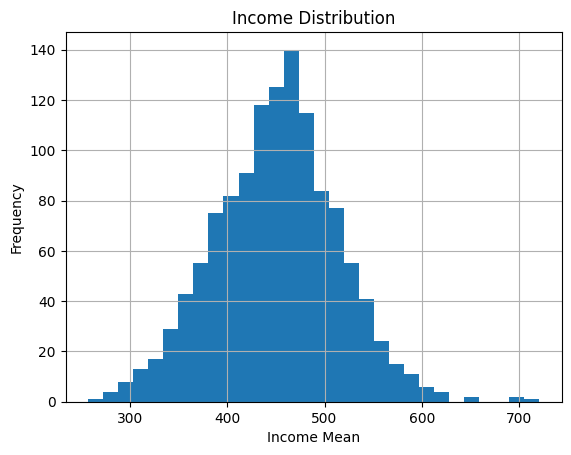

In [88]:
#収入の分布（ヒストグラム）
plt.hist(final_data['income_mean'], bins=30)
plt.title('Income Distribution')
plt.xlabel('Income Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

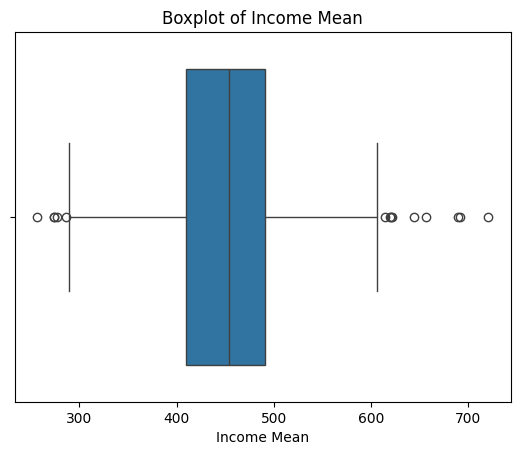

In [89]:
#収入の分布（箱ひげ図）
sns.boxplot(x=final_data['income_mean'])
plt.title('Boxplot of Income Mean')
plt.xlabel('Income Mean')
plt.show()

##データの確認（final_data）

In [90]:
final_data

,district_id,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,...,family_work_male,unkonwn_status_male,employer_female,self_employed_female,family_work_female,unkonwn_status_female,area_code,income_mean,female_ratio,male_ratio
0,1101,8004X-1141829552226111116188975142365334642613...,9904X-1231996512522513983011765252154307231020...,13478X--31217532516415716283374621410212223112...,16422X--561802351514391771524121418121-2507821...,17811X--67241871116144024715321336414224127135...,18566X-371827116121610165523916379632102353376...,20375X-252934915131611134724252846167141023334...,18634X-112438216112312144822351647191191624385...,16687X--68337352061248152428541312125303210847...,...,151X----1----1-------------4------1--1------24...,6564X--6187-2461155319144---581-97521381641551...,39149X--12147421413323846110415337124391124115...,2641X--1156-153443469-222542-611455624342-25-5...,1107X--1137--2-35-6-622-2252-35--2133521221411...,5261X---360-21469253151-2144-169-13914379-6412...,1101,449.979373,NaN,NaN
1,1102,1172766429911121182101027272118145112219725914...,1444176727111412522410301617362365102225168228...,1778860724994719115201617312041513201433195161...,1468753413671211191923152033214991119108172915...,1620473425141479224519182241211414211219117243...,1897488431201212930813272939452831628222225113...,2224411083614221812371223249455530515211138341...,1934911554416221513353222738465637419262127151...,1784387136161213931312341742712961013273410835...,...,2842-2----3----1--2-----4---12--------1------2...,4910212723437842371089115341280416211623272572...,4826123513754440273684050827210014091115052408...,21449-224-133-2-94114221613622143-11-3354241--...,13767-2131-21123123-12112229--233133-332222---...,364516-6421356811566812232116631147842-4253434...,1102,395.847532,NaN,NaN
2,1103,1040896-2111810-X202193-1--1535129933172610931...,1215393-517156-X7297-14--223461108221720814821...,1377587-1216174-X2237-1---56037125212982411121...,1523271-1016166-X510411---24029158163225201916...,17385109-7301411-X15189121--115382153644461916...,19080162-6242625-X212813912--79382512068513224...,21889136-7122016-X1430195133-69662592072373720...,18885151-8313211-X133010235--65551862344293115...,16581136-7342815-X82581221-5471184243422312116...,...,2314--12--X-1-------145--11-111---1--------1--...,521923--574-X131-----2-94461182342242-87122527...,45215353-26626735-X1688251079--823118496651197...,171717--384-X-2-------11521-553511-1--14124211...,10876-111--X-2--1----536234-7413211--16133122-...,329013-143--X-41-------61857211--11--4386203-2...,1103,404.742547,NaN,NaN
3,1104,7629901031103929152125741437294114101733148114...,8461106212716425731719100212110262241111218675...,1052817683824611116133172577151366534122395330...,1327529810832679117592414235610557547961188566...,1486233211949541101347822343378652378478152426...,1623429178673511112258273728972471666881304232...,1776829360943110814579273929550543352106134315...,1550125645932494134752336241533627428311433295...,1412522444741987130722137187373413376611339353...,...,150-----2-11321-------211-413--1-1-------1-1--...,5354923722112275481314141412611422169302118783...,3684167114716710425333617271936591541237211819...,1465246837123542757735171043128227151-19335824...,78814131964111773-521--111524945--112243912245...,3758903921822725112911948171721166025201563231...,1104,385.278248,NaN,NaN
4,1105,7856381319-32332--23749-17215314X8696641116852...,93948414812134132221-4601123147215294X15310611...,12191133391515431382312--1107391951161114-83X3...,14157239784127483472215--31787124420234177-35X...,15469227404254127241016191-2187573252712121618...,16326231382699451441919--316046192209171012122...,179292023428804101471274-21584225316676195227X...,15964148271758-8949121-31302230125126254176X26...,1441713621244525814410--3129183426588273117X18...,...,1432--1--1------1-1---------X21---1--------2--...,5149731910172210274---61141141144452-2X1411820...,383544277558123823382338236-123588771527111617...,18001644311--3---

In [91]:
print(final_data.columns)

Index(['district_id', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54',
       ...
       'family_work_male', 'unkonwn_status_male', 'employer_female',
       'self_employed_female', 'family_work_female', 'unkonwn_status_female',
       'area_code', 'income_mean', 'female_ratio', 'male_ratio'],
      dtype='object', length=194)


In [92]:
for col in final_data.columns:
    print(col)

district_id
10-14
15-19
20-24
25-29
30-34
35-39
40-44
45-49
50-54
55-59
60-64
65-69
70-74
75-79
80-84
85-89
90-94
95-99
100
0-4_male
5-9_male
10-14_male
15-19_male
20_24_male
25-29_male
30-34_male
35-39_male
40-44_male
45-49_male
50-54_male
55-59_male
60-64_male
65-69_male
70-74_male
75-79_male
80-84_male
85-89_male
90-94_male
95-99_male
100_male
0-4_female
5-9_female
10-14_female
15-19_female
20_24_female
25-29_female
30-34_female
35-39_female
40-44_female
45-49_female
50-54_female
55-59_female
60-64_female
65-69_female
70-74_female
75-79_female
80-84_female
85-89_female
90-94_female
95-99_female
100_female
family_count_x
family_member_count
general_family_count
member_1
member_2
member_3
member_4
member_5
member_6
member_7
population
male_population
female_population
family_count_y
family_house
own_house_family
public_rent_family
private_rent_family
salary_rent_family
room_rent_family
other_house_family
own_house_individual
public_rent_individual
private_rent_individual
salary_rent_i

In [93]:
final_data['male_population'] = pd.to_numeric(final_data['male_population'], errors='coerce')
final_data['female_population'] = pd.to_numeric(final_data['female_population'], errors='coerce')
final_data['population'] = pd.to_numeric(final_data['population'], errors='coerce')

##可視化①性別人口と収入の関係

In [94]:
# 男性比率・女性比率
final_data['male_ratio'] = final_data['male_population'] / final_data['population']
final_data['female_ratio'] = final_data['female_population'] / final_data['population']

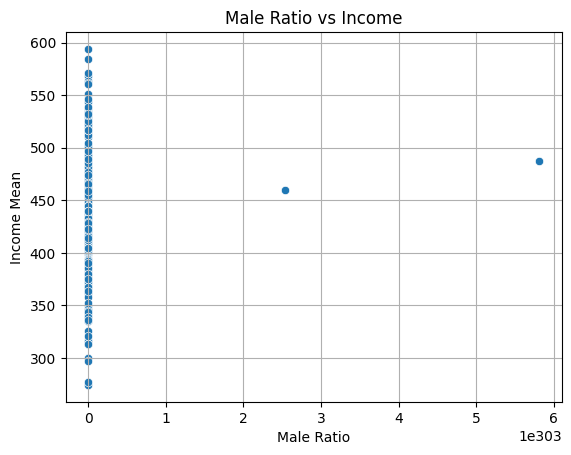

In [100]:
sns.scatterplot(x=final_data['male_ratio'], y=final_data['income_mean'])
plt.title('Male Ratio vs Income')
plt.xlabel('Male Ratio')
plt.ylabel('Income Mean')
plt.grid(True)
plt.show()

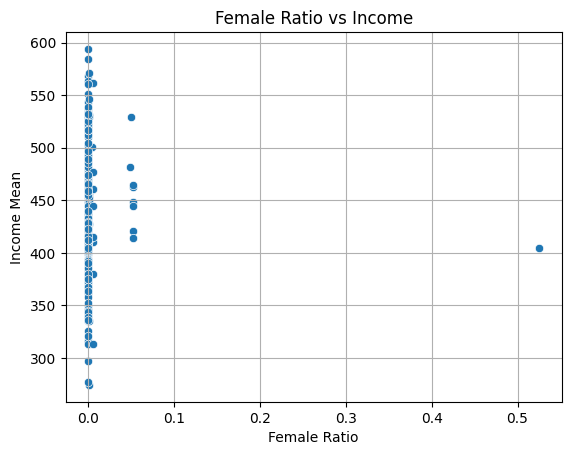

In [96]:
sns.scatterplot(x=final_data['female_ratio'], y=final_data['income_mean'])
plt.title('Female Ratio vs Income')
plt.xlabel('Female Ratio')
plt.ylabel('Income Mean')
plt.grid(True)
plt.show()

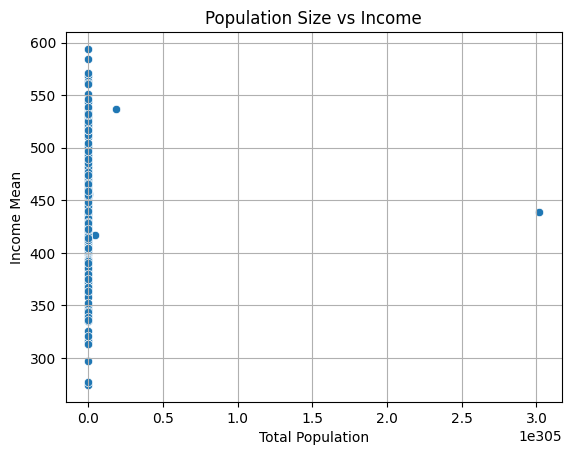

In [97]:
# 総人口と収入の関係
sns.scatterplot(x=final_data['population'], y=final_data['income_mean'])
plt.title('Population Size vs Income')
plt.xlabel('Total Population')
plt.ylabel('Income Mean')
plt.grid(True)
plt.show()

In [98]:
print(final_data[['male_ratio', 'population', 'income_mean']].corr())

             male_ratio  population  income_mean
male_ratio     1.000000        -0.0    -0.018101
population    -0.000000         NaN     0.000000
income_mean   -0.018101         0.0     1.000000


In [85]:
print(final_data[['female_ratio', 'population', 'income_mean']].corr())

              female_ratio  population  income_mean
female_ratio      1.000000        -0.0    -0.019617
population       -0.000000         NaN     0.000000
income_mean      -0.019617         0.0     1.000000


In [121]:
#単回帰分析
import pandas as pd
import statsmodels.api as sm

regression_data = final_data[['male_population', 'female_population', 'income_mean']].dropna()

X = regression_data['female_population']
y = regression_data['income_mean']

# 定数項を加える（切片）
X = sm.add_constant(X)

# モデルの作成・フィッティング
model = sm.OLS(y, X).fit()

# 結果の表示
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            income_mean   R-squared:                     -45.953
Model:                            OLS   Adj. R-squared:                -45.953
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 05 Aug 2025   Prob (F-statistic):                nan
Time:                        22:38:06   Log-Likelihood:                -1614.6
No. Observations:                 215   AIC:                             3231.
Df Residuals:                     214   BIC:                             3235.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                      0          

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1949: RuntimeWarning: overflow encountered in square
  eigvals = self._wexog_singular_values ** 2


/tmp/ipython-input-652853078.py:15: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-652853078.py:15: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-652853078.py:15: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-652853078.py:15: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-652853078.py:15: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-652853078.py:15: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-652853078.py:15: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from

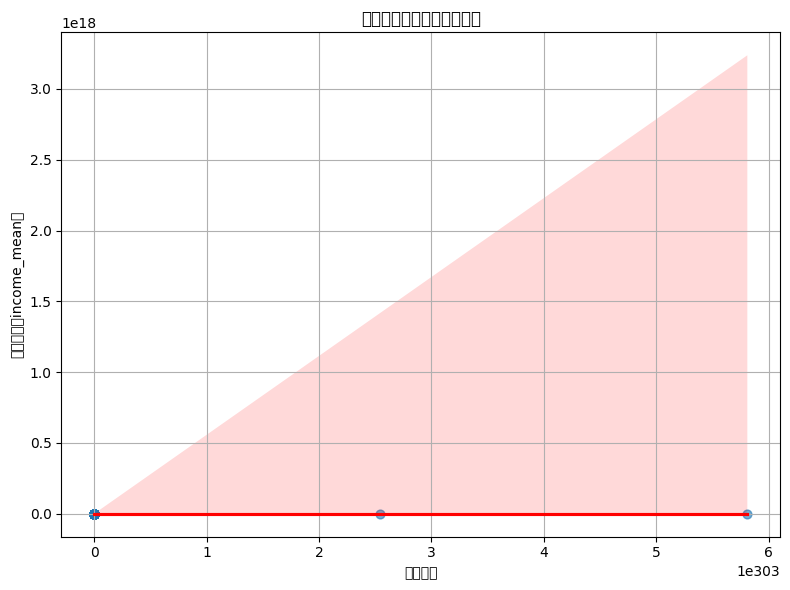

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 必要な列を選び、欠損値を除く
plot_data = final_data[['female_population', 'income_mean']].dropna()

# グラフ描画
plt.figure(figsize=(8, 6))
sns.regplot(x='female_population', y='income_mean', data=plot_data, scatter_kws={'s': 40, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.xlabel('女性人口')
plt.ylabel('平均収入（income_mean）')
plt.title('女性人口と平均収入の関係')
plt.grid(True)
plt.tight_layout()
plt.show()


##可視化②婚姻状態と収入の関係

In [110]:
final_data['married_male'] = pd.to_numeric(final_data['married_male'], errors='coerce')
final_data['married_female'] = pd.to_numeric(final_data['married_female'], errors='coerce')
final_data['unmarried_male'] = pd.to_numeric(final_data['unmarried_male'], errors='coerce')
final_data['unmarried_female'] = pd.to_numeric(final_data['unmarried_female'], errors='coerce')

In [111]:
# 結婚男性・未婚男性
final_data['married_male_ratio'] = final_data['married_male'] / final_data['population']
final_data['unmarried_male_ratio'] = final_data['unmarried_male'] / final_data['population']

In [112]:
# 結婚女性・未婚女性
final_data['married_female_ratio'] = final_data['married_female'] / final_data['population']
final_data['unmarried_female_ratio'] = final_data['unmarried_female'] / final_data['population']

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  fig.canvas

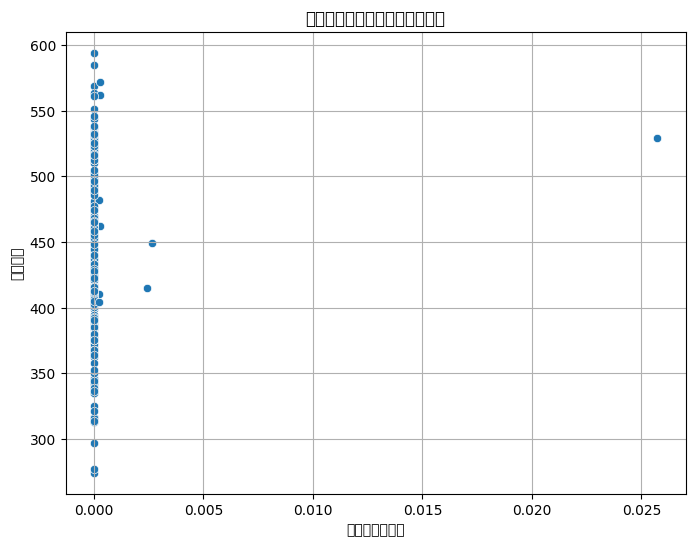

In [114]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_data, x='married_male_ratio', y='income_mean')
plt.title('結婚男性比率と平均収入の関係')
plt.xlabel('結婚男性の比率')
plt.ylabel('平均収入')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  fig.canvas

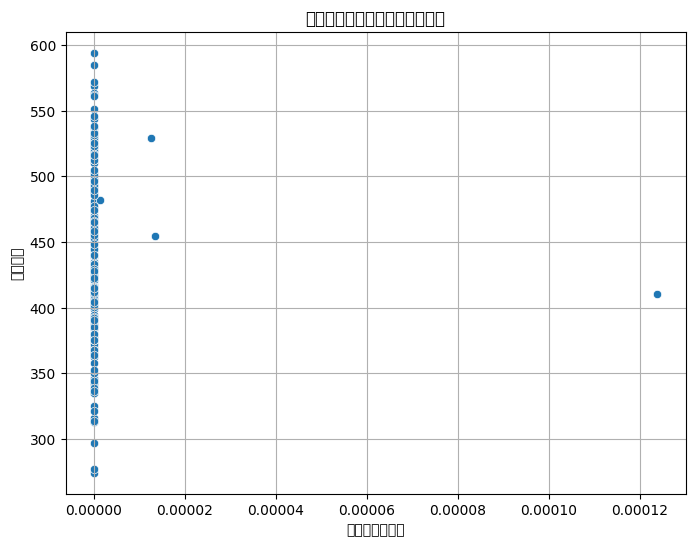

In [113]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_data, x='unmarried_male_ratio', y='income_mean')
plt.title('未婚男性比率と平均収入の関係')
plt.xlabel('未婚男性の比率')
plt.ylabel('平均収入')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  fig.canvas

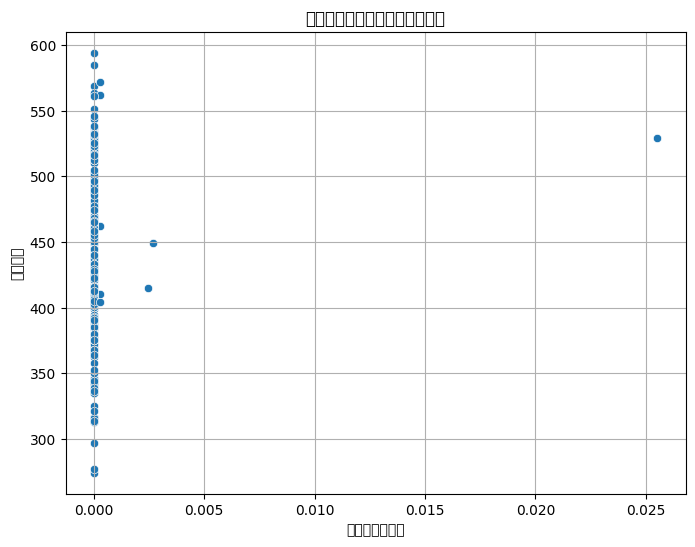

In [115]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_data, x='married_female_ratio', y='income_mean')
plt.title('結婚女性比率と平均収入の関係')
plt.xlabel('結婚女性の比率')
plt.ylabel('平均収入')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from font(s) DejaVu Sans.
  fig.canvas

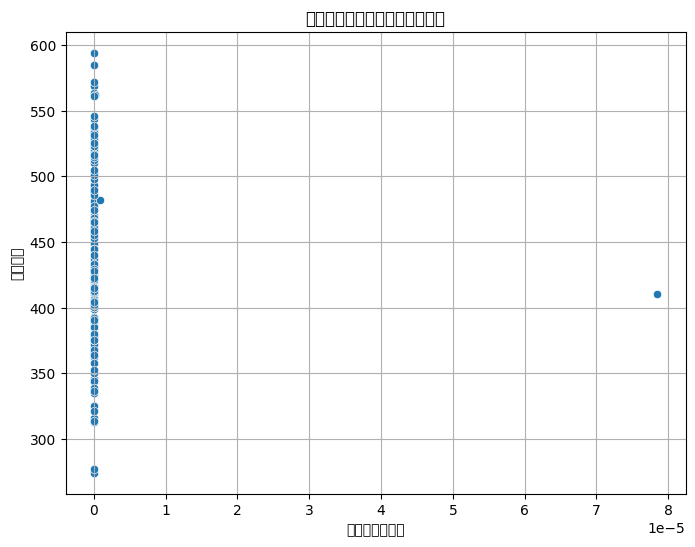

In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_data, x='unmarried_female_ratio', y='income_mean')
plt.title('未婚女性比率と平均収入の関係')
plt.xlabel('未婚女性の比率')
plt.ylabel('平均収入')
plt.grid(True)
plt.show()

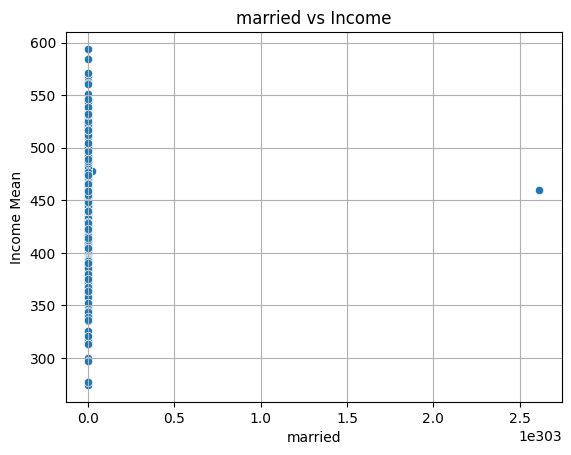

In [118]:
#全体結婚と収入の関係
final_data['married']=pd.to_numeric(final_data['married'], errors='coerce')
sns.scatterplot(x=final_data['married'], y=final_data['income_mean'])
plt.title('married vs Income')
plt.xlabel('married')
plt.ylabel('Income Mean')
plt.grid(True)
plt.show()

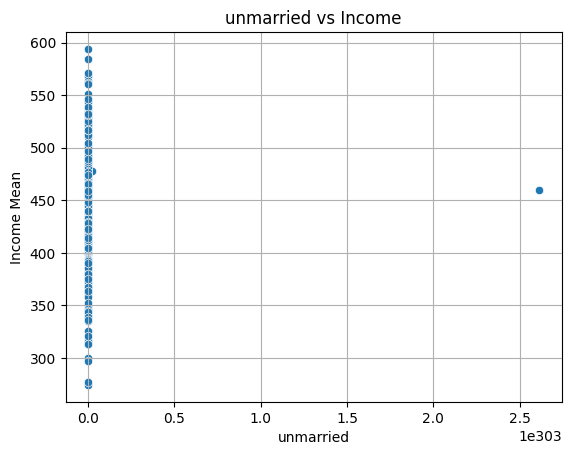

In [119]:
#全体未婚と収入の関係
final_data['unmarried']=pd.to_numeric(final_data['unmarried'], errors='coerce')
sns.scatterplot(x=final_data['married'], y=final_data['income_mean'])
plt.title('unmarried vs Income')
plt.xlabel('unmarried')
plt.ylabel('Income Mean')
plt.grid(True)
plt.show()

In [123]:
#回帰分析
import statsmodels.api as sm
import pandas as pd

# 分析対象の変数を指定
X = final_data[['married_male_ratio', 'unmarried_male_ratio', 'married_female_ratio', 'unmarried_female_ratio']]
y = final_data['income_mean']

# 欠損値を除去
data_for_model = pd.concat([X, y], axis=1).dropna()

# 説明変数・目的変数に分離
X_clean = data_for_model[['married_male_ratio', 'unmarried_male_ratio', 'married_female_ratio', 'unmarried_female_ratio']]
y_clean = data_for_model['income_mean']

# 定数項を追加
X_clean = sm.add_constant(X_clean)

# モデル作成とフィッティング
model = sm.OLS(y_clean, X_clean).fit()

# 結果表示
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            income_mean   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6160
Date:                Tue, 05 Aug 2025   Prob (F-statistic):              0.652
Time:                        22:40:49   Log-Likelihood:                -976.26
No. Observations:                 175   AIC:                             1963.
Df Residuals:                     170   BIC:                             1978.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    440

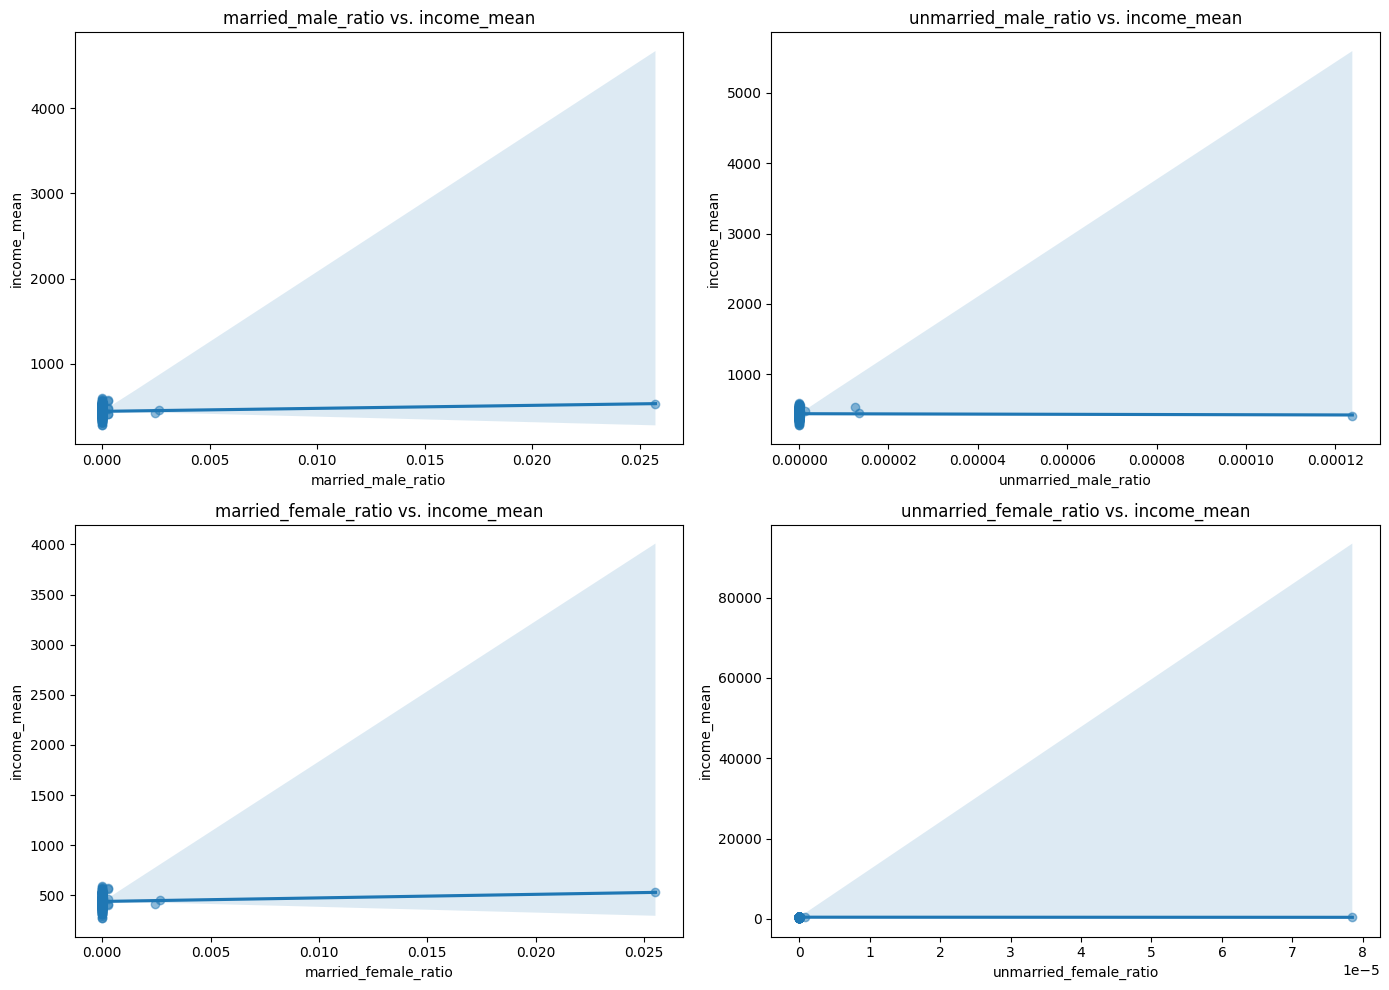

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可視化対象の変数
target_vars = [
    'married_male_ratio',
    'unmarried_male_ratio',
    'married_female_ratio',
    'unmarried_female_ratio'
]

# グラフの設定
plt.figure(figsize=(14, 10))
for i, var in enumerate(target_vars, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=final_data[var], y=final_data['income_mean'], scatter_kws={'alpha':0.5})
    plt.title(f'{var} vs. income_mean')
    plt.xlabel(var)
    plt.ylabel('income_mean')

plt.tight_layout()
plt.show()


#モデルの精度評価と改善の工夫

本分析では、地域の人口構成や婚姻状態などの社会的要因から収入（income_mean）を予測するモデルの構築を試みた。最終的には、いくつかの変数（例：性別人口、婚姻状態、職業構成など）を特徴量として使用し、回帰モデルを構築した。

しかし、モデルの予測精度は高くはなく、相関係数も弱い結果にとどまった（例：性別人口と収入との相関は -0.01〜-0.02 程度で、明確な関係性は見られなかった）。

今後、精度の高いモデルを得るためには、以下のような改善が必要であると考えられる。

* 特徴量エンジニアリング

・比率変数（例：女性比率、婚姻状態比率など）を導入し、スケールの影響を除去する

・複数の変数を組み合わせた交互作用項や、非線形変換（例：対数変換）を導入する

* 変数選定の見直し

・相関が極端に低い変数は除外し、情報量の高い変数を優先的に活用する

・多重共線性の影響を減らすために、相関の高い変数同士の整理を行う

* モデル選定

・線形回帰に加え、ランダムフォレストや勾配ブースティングなど、非線形の機械学習モデルも試行することで、構造の複雑なデータに対応できる可能性がある

* クロスバリデーションによる汎化性能の評価

・訓練データとテストデータを分け、過学習を防ぎつつ安定した精度評価を行う

分析に取り組んだ感想
今回の分析では、事前の想定よりもモデルの精度が伸びず、十分な予測性能を持つモデルを構築することは難しかった。原因としては、データ整形の不十分さが大きいと考えられる。

特に以下の点が課題となった：

* 欠損値の処理が一部不完全で、分析対象から除外されるデータが多かった

* 変数の型（数値・文字列など）の取り扱いに苦慮し、一部の特徴量が正しくモデルに反映されなかった

* カラム名や変数の意味が複雑で、構造の把握に時間を要した

こうした経験から、機械学習以前の前処理の重要性を実感した。今後は、モデル構築に入る前段階のデータクレンジングや可視化をより丁寧に行い、分析の精度を高めていきたい。